# Comparison of the STFT implementation


### Using my own code


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from STFT_Fab import spect_fab


### Creation of the sample signal


In [2]:
# composicion de nueva señal chirp
f1_ = 1  # Frecuencia inicial del chirp
f2_ = 50  # Frecuencia final del chirp

Fs = 100  # Frecuencia de muestreo

t = np.arange(0, 10, 1/Fs)  # vector de tiempos
N_ = len(t)

x_ = signal.chirp(t, f1_, t[-1], f2_)  # Señal sin ventana


### Use of Fabian's code


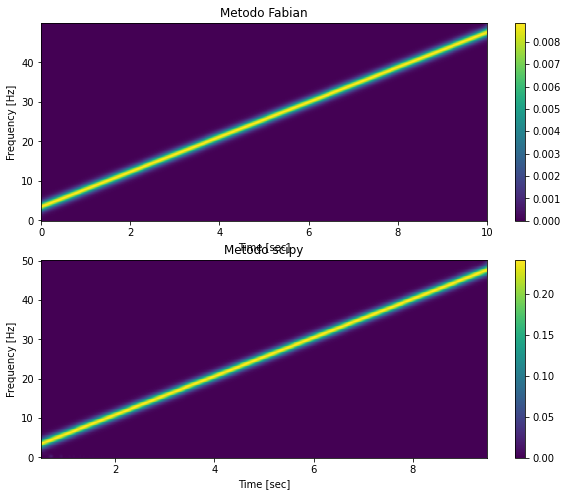

In [3]:
w_s = 100
w_o = 99
# window_s = 'boxcar' 
# window_s = 'hamming' 
window_s = 'hann' 
# window_s = 'blackmanharris' 
# window_s = 'barthann'
# window_s = 'tukey'
# window_s = 'taylor' 

ff, tt, Sxxf = spect_fab(x_, Fs, window=window_s,
                         w_size=w_s, w_over=w_o, nfft=512)
f_, t_, Sxx = signal.spectrogram(x_, Fs, window=window_s, nperseg=w_s, noverlap=w_o, nfft=512,
                                 detrend='constant', return_onesided=True, scaling='density', axis=- 1, mode='psd')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.pcolormesh(tt, ff, Sxxf)  # , extent=[0, t[-1], 0,int(Fs/2)])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Metodo Fabian')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.pcolormesh(t_, f_, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Metodo scipy')
plt.colorbar()

plt.show()


## Using simulated ECG signal

Load the signal

```python
from scipy.fft import fft, ifft
X = fft(x_, n=1024) # devuelve el FFT con un tamaño de vector de 1024 datos
```

In [4]:
import pandas as pd

data = pd.read_csv("ecg_file.csv")
df = pd.DataFrame(data).to_numpy()



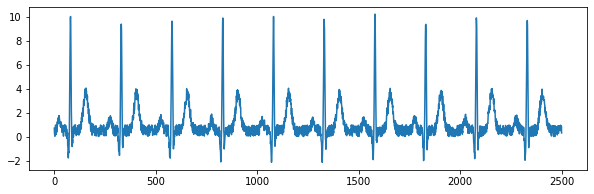

In [9]:
datos = df[:,1] + np.random.random(len(df[:,1]))
Fs = 250

plt.figure(figsize=(10, 3))
plt.plot(datos)

Probar la señal con STFT

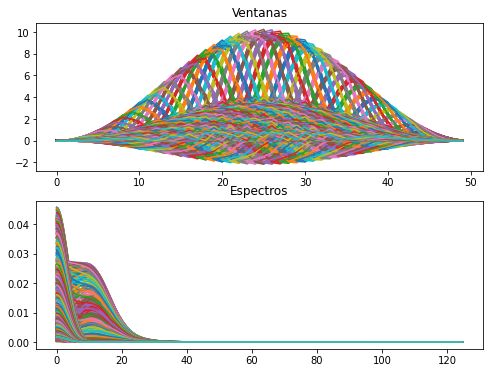

In [10]:
w_s = 50
w_o = 49
# window_s = 'boxcar' 
# window_s = 'hamming' 
window_s = 'hann' 
# window_s = 'blackmanharris' 
# window_s = 'barthann'
# window_s = 'tukey'
# window_s = 'taylor' 

ff, tt, Sxxf = spect_fab(datos, Fs, window=window_s,
                         w_size=w_s, w_over=w_o, nfft=512, process = True)
f_, t_, Sxx = signal.spectrogram(datos, Fs, window=window_s, nperseg=w_s, noverlap=w_o, nfft=512,
                                 detrend='constant', return_onesided=True, scaling='density', axis=- 1, mode='psd')


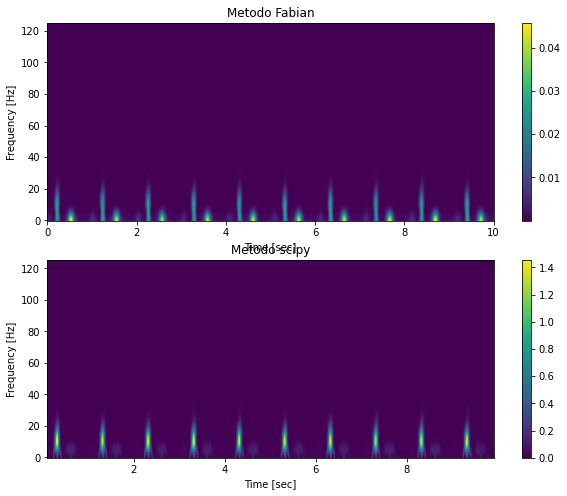

In [11]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.pcolormesh(tt, ff, Sxxf)  # , extent=[0, t[-1], 0,int(Fs/2)])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Metodo Fabian')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.pcolormesh(t_, f_, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Metodo scipy')
plt.colorbar()

plt.show()
